# Rahul M N- PH17B009

Solving ODE's using 
1.Euler Method
2.Runge Kutta 2nd order
3.Runge Kutta 4th order


# Euler 

ODE using forward Euler
Consider the ODE$$
y' = y, \qquad t \ge 0
$$with initial condition$$
y(0) = 1
$$The exact solution is$$
y(t) = \exp(t)
$$

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def f(t,y):
    return y

In [3]:
def yexact(t):
    return np.exp(t)

This implements Euler method$$
y_n = y_{n-1} + h f(t_{n-1},y_{n-1})
$$

In [4]:
def euler(t0,T,y0,h):
    N = int((T-t0)/h)
    y = np.zeros(N)
    t = np.zeros(N)
    y[0] = y0
    t[0] = t0
    for n in range(1,N):
        y[n] = y[n-1] + h*f(t[n-1],y[n-1])
        t[n] = t[n-1] + h
    return t, y

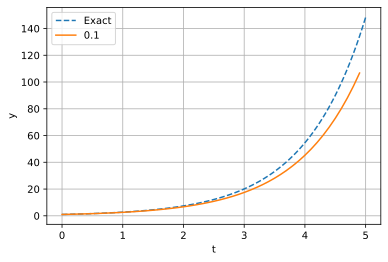

In [5]:
t0,y0,T = 0.0,1.0,5.0

te = np.linspace(t0,T,100)
ye = yexact(te)
plt.plot(te,ye,'--')

#Step Size
# H = [0.2,0.1,0.05]

# for h in H:
t,y = euler(t0,T,y0,0.1)
plt.plot(t,y)

plt.legend(('Exact','0.1'),loc=2)
plt.xlabel('t')
plt.ylabel('y')
plt.grid(True);

# RK - 2 

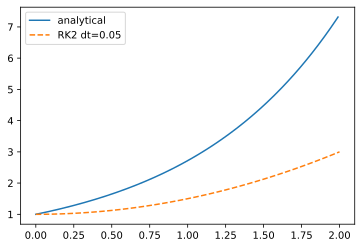

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from math import exp  # exponential function

dy = lambda x, y: x
f = lambda x: exp(x)  # analytical solution function
x_final = 2

# analytical solution
x_a = np.arange(0, x_final, 0.01)
y_a = np.zeros(len(x_a))
for i in range(len(x_a)):
    y_a[i] = f(x_a[i])

plt.plot(x_a, y_a, label="analytical")

# Container for step sizes dt /dt
dt = 0.05

x = 0
y = 1
# print("dt = " + str(dt))
# print("x \t\t y (Euler) \t y (analytical)")
# print("%f \t %f \t %f" % (x, y, f(x)))

n = int((x_final - x) / dt)

# Runge-Kutta's method 2'nd order (RK2)
x = 0
y = 1
# print("dt = " + str(dt))
# print("x \t\t y (rk2) \t y (analytical)")
# print("%f \t %f \t %f" % (x, y, f(x)))

n = int((x_final - x) / dt)

x_r = np.zeros(n + 1)
y_r = np.zeros(n + 1)
x_r[0] = x
y_r[0] = y

# Plot the RK2
for i in range(n):
    K1 = dt*dy(x,y) # Step 1
    K2 = dt*dy(x+dt/2,y+K1/2) # Step 2
    y += K2 # Step 3
    x += dt
    #print("%f \t %f \t %f" % (x, y, f(x)))
    x_r[i + 1] = x
    y_r[i + 1] = y
plt.plot(x_r, y_r, "--", label="RK2 dt=" + str(dt))

plt.legend()
plt.show()

# RK-4


Runge-Kutta 4th order method
$$k_1 = f(t_n,y_n)$$$$k_2 = f(t_n +h/2,y_n + h k_1/2)$$$$k_3 = f(t_n+h/2,y_n+h k_2/2)$$$$k_4 = f(t_n+h,y_n+h k_3)$$


$$t_{n+1} = t_n +h$$$$y_{n+1} = y_{n} + \frac{1}{6}(k_1+2k_2+2k_3+k_4)$$

In [7]:
def RK4(f,y0,t0,tf,h=0.1):
    
    t = np.arange(t0,tf,h)
    
    y = np.zeros(len(t))
    y[0] = y0
    
    for n in range(0,len(t)-1):
        
        k1 = f(y[n],t[n])
        
        k2 = f(y[n]+h* k1/2.0,t[n]+h/2.0)
        k3 = f(y[n]+h* k2/2.0,t[n]+h/2.0)
        k4 = f(y[n]+h*k3,t[n]+h)
    
        
        y[n+1] = y[n] + (1.0/6.0)*h*(k1+2*k2+2*k3+k4)
        
    return t,y

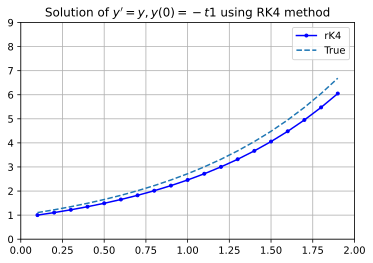

In [8]:
y0 = 1

f = lambda y,t: y

t,y = RK4(f,y0,0.1,2)

y_true = 1*np.exp(t)

plt.plot(t,y,'b.-',t,y_true,'--')
plt.legend(['rK4','True'])
plt.axis([0,2,0,9])
plt.grid(True)
plt.title("Solution of $y'=y , y(0)=-t1$ using RK4 method")
plt.show()